In [1]:
import logging

import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from scipy.stats import norm

from Preprocessing import Preprocessing
from FeatureEngineering import FeatureEngineering

In [2]:
date_parser = lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S.%f")

df = pd.read_excel('Project 2_2023.xlsx', sheet_name='Data', parse_dates=['Date'], date_parser=date_parser)
df = df.set_index('Date')
df.index.name = 'Date'
df['Balance_correct'] = df['Income'] - df['Outcome']

<ipython-input-2-c6ce57fc7f23>:3: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_excel('Project 2_2023.xlsx', sheet_name='Data', parse_dates=['Date'], date_parser=date_parser)


In [3]:
prep = Preprocessing()
series = prep.preprocess(df['Balance_correct'])

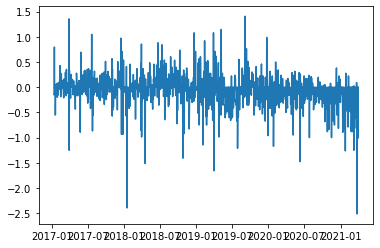

In [4]:
plt.plot(series)

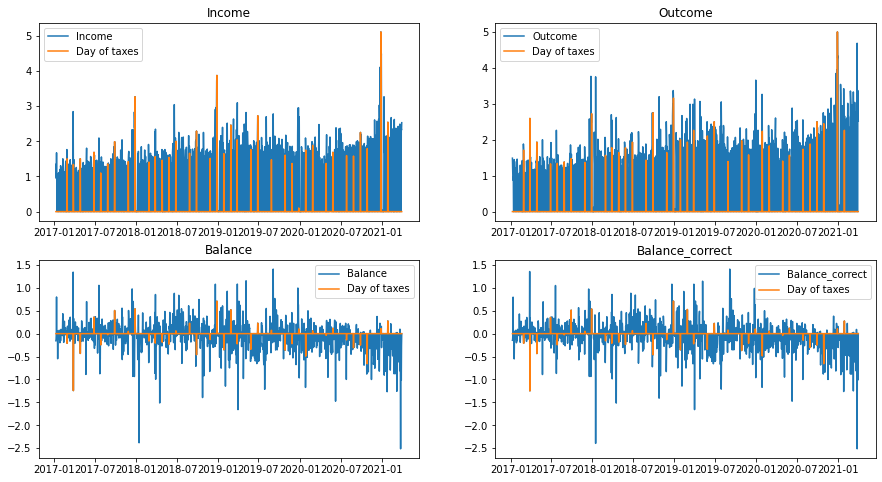

In [5]:
df['Taxes'] = list(pd.Series(df.index).apply(lambda x: 1 if x.day == 28 else 0))

fig, axs = plt.subplots(2, 2, figsize=(15, 8))
for i, column in enumerate(df.columns[:4]):
    axs[i//2][i%2].plot(df[column], label=column)
    axs[i//2][i%2].plot(df[column]*df['Taxes'], label='Day of taxes')
    axs[i//2][i%2].set_title(column)
    axs[i//2][i%2].legend()

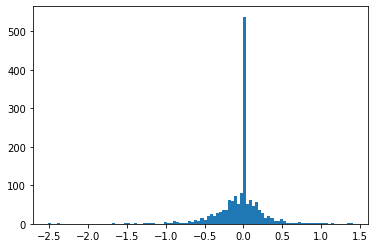

In [6]:
plt.hist(df['Balance_correct'], bins=100)
print()

# Поиск аномалий

# FE

In [7]:
fe = FeatureEngineering(series)
a = fe.get_features()

Feature Extraction: 100%|██████████| 193/193 [00:02<00:00, 77.86it/s] 


  0%|          | 0/658 [00:00<?, ?it/s]

In [8]:
a.shape

(1542, 119)

# FS

In [12]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression, Lasso


class FeatureSelection():
    def __init__(self, features, target, k_features=50):
        self.features = features
        self.target = target
        self.k_features = k_features
        self.wrapper_features = None
        self.correlation_features = None
        self.filter_features = None
        
    # Оберточный метод
    def wrapper_method(self):
        feature_selector = SequentialFeatureSelector(Lasso(),
           k_features=self.k_features,
           forward=True,
           verbose=2,
           scoring='neg_mean_absolute_error',
           cv=4)
        features = feature_selector.fit(np.array(self.features.fillna(0)), self.target)
        self.wrapper_features = self.features[self.features.columns[list(features.k_feature_idx_)]]
        return self.wrapper_features
    
    # Фильтр – корреляция
    def correlation_method(self):
        corr = dict()
        for i in self.features.columns:
            corr[i] = [self.target.corr(self.features[i])]
        self.correlation_features = \
                self.features[pd.DataFrame(corr).T.sort_values(0, 
                                                               key=abs, 
                                                               ascending=False).iloc[:self.k_features].index]
        return self.correlation_features

    # Фильтр
    def filtered_method(self):
        # Remove quasi-constant features
        filter_ = VarianceThreshold(threshold=0.01)
        constant_filter.fit(self.features)
        self.filter_features = constant_filter.transform(self.features)
        return filter_features
        



In [ ]:
from pyitlib import discrete_random_variable as drv
drv.information_mutual_conditional(features[chosen_columns], 
                                   pd.DataFrame(target.values), 
                                   features[[features.columns[2]]])

In [ ]:
features[chosen_columns].values.flatten()

In [ ]:
1

In [22]:
mutual_info_regression(features[chosen_columns], target)

array([0])

In [21]:
chosen_columns = [features.columns[1]]
for column in features.columns[1:]:
    print(column, )

taxes_day
diffs_1
diffs_2
diffs_3
diffs_4
diffs_5
diffs_6
diffs_7
diffs_8
diffs_9
diffs_10
diffs_11
diffs_12
diffs_13
diffs_14
diffs_15
diffs_16
diffs_17
diffs_18
diffs_19
diffs_20
diffs_21
lag_1
lag_2
lag_3
lag_4
lag_5
lag_6
lag_7
lag_8
lag_9
lag_10
lag_11
lag_12
lag_13
lag_14
lag_15
lag_16
lag_17
lag_18
lag_19
lag_20
lag_21
ma_2
ma_3
ma_4
ma_5
ma_6
ma_7
ma_8
ma_9
ma_10
ma_11
ma_12
ma_13
ma_14
ma_15
ma_16
ma_17
ma_18
ma_19
ma_20
ma_21
fourier_sin_1
fourier_cos_1
fourier_sin_2
fourier_cos_2
fourier_sin_3
fourier_cos_3
fourier_sin_4
fourier_cos_4
fourier_sin_5
fourier_cos_5
fourier_sin_6
fourier_cos_6
fourier_sin_7
fourier_cos_7
fourier_sin_8
fourier_cos_8
fourier_sin_9
fourier_cos_9
fourier_sin_10
fourier_cos_10
fourier_sin_11
fourier_cos_11
fourier_sin_12
fourier_cos_12
fourier_sin_13
fourier_cos_13
fourier_sin_14
fourier_cos_14
fourier_sin_15
fourier_cos_15
fourier_sin_16
fourier_cos_16
fourier_sin_17
fourier_cos_17
fourier_sin_18
fourier_cos_18
fourier_sin_19
fourier_cos_19
fourier_

In [16]:
x = 

In [18]:
len(x)

119

In [13]:
features = a
target = series.shift(-1)[:-1]

In [14]:
fs = FeatureSelection(features, target)
res = fs.wrapper_method()
res_cor = fs.correlation_method()
res_filter = fs.filtered_method()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 119 out of 119 | elapsed:    0.8s finished

[2023-05-19 13:28:03] Features: 1/50 -- score: -0.18760944033832855[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 118 out of 118 | elapsed:    0.7s finished

[2023-05-19 13:28:04] Features: 2/50 -- score: -0.18760944033832855[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 117 out of 117 | elapsed:    0.7s finished

[2023-05-19 13:28:04] Features: 3/50 -- score: -0.18760944033832855[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: 

NameError: name 'constant_filter' is not defined

# Model select

In [59]:
res_cor

,lag_6,ma_8,ma_14,ma_9,ma_10,ma_7,ma_11,ma_13,ma_12,Balance__count_below__t_0,...,Balance__mean,Balance__quantile__q_0.9,Balance__maximum,Balance__quantile__q_0.2,Balance__quantile__q_0.6,Balance__sum_values,ma_4,ma_3,day_of_week,lag_7
2017-01-09,0.000000,-0.144836,-0.144836,-0.144836,-0.144836,-0.144836,-0.144836,-0.144836,-0.144836,1.0,...,-0.144836,-0.144836,-0.144836,-0.144836,-0.144836,-0.144836,-0.144836,-0.144836,0.000000,0.000000
2017-01-10,0.000000,-0.135204,-0.135204,-0.135204,-0.135204,-0.135204,-0.135204,-0.135204,-0.135204,1.0,...,-0.125572,-0.125572,-0.125572,-0.125572,-0.125572,-0.125572,-0.135204,-0.135204,0.143837,0.000000
2017-01-11,0.000000,-0.087547,-0.087547,-0.087547,-0.087547,-0.087547,-0.087547,-0.087547,-0.087547,0.0,...,0.007767,0.007767,0.007767,0.007767,0.007767,0.007767,-0.087547,-0.087547,0.293751,0.000000
2017-01-12,0.000000,0.133545,0.133545,0.133545,0.133545,0.133545,0.133545,0.133545,0.133545,0.0,...,0.796823,0.796823,0.796823,0.796823,0.796823,0.796823,0.133545,0.226339,0.456893,0.000000
2017-01-13,0.000000,0.102892,0.102892,0.102892,0.102892,0.102892,0.102892,0.102892,0.102892,1.0,...,-0.019721,-0.019721,-0.019721,-0.019721,-0.019721,-0.019721,0.164824,0.261623,0.642986,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-26,0.000000,-0.661639,-0.521035,-0.639328,-0.616213,-0.671514,-0.606876,-0.561114,-0.607874,1.0,...,-2.514887,-2.514887,-2.514887,-2.514887,-2.514887,-2.514887,-0.971062,-1.325473,0.642986,-0.592513
2021-03-27,0.000000,-0.587575,-0.521035,-0.588124,-0.575396,-0.671514,-0.560194,-0.561114,-0.556303,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.994104,-1.127968,0.867008,0.000000
2021-03-28,-0.816351,-0.587575,-0.521035,-0.522289,-0.529311,-0.671514,-0.523087,-0.513511,-0.513511,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.845976,-0.838296,1.154866,0.000000
2021-03-29,0.092169,-0.714307,-0.549250,-0.634939,-0.571445,-0.699729,-0.573361,-0.551999,-0.563984,1.0,...,-1.013855,-1.013855,-1.013855,-1.013855,-1.013855,-1.013855,-0.882185,-0.337952,0.000000,-0.816351


# Калибровка

# Поиск разладки

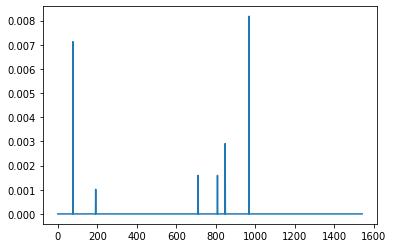

In [7]:
class Stat(object):
    def __init__(self, threshold, direction="unknown", init_stat=0.0):
        self._direction = str(direction)
        self._threshold = float(threshold)
        self._stat = float(init_stat)
        self._alarm = self._stat / self._threshold
    
    @property
    def direction(self):
        return self._direction

    @property
    def stat(self):
        return self._stat
        
    @property
    def alarm(self):
        return self._alarm
        
    @property
    def threshold(self):
        return self._threshold
    
    def update(self, **kwargs):
        # Statistics may use any of the following kwargs:
        #   ts - timestamp for the value
        #   value - original value
        #   mean - current estimated mean
        #   std - current estimated std
        #   adjusted_value - usually (value - mean) / std
        # Statistics call this after updating '_stat'
        self._alarm = self._stat / self._threshold
        
def normal_likelihood(value, mean_0, mean_8, std):
    return np.log(norm.pdf(value, mean_0, std) / norm.pdf(value, mean_8, std))

class Cusum(Stat):
    def __init__(self, mean_0, mean_8, std,
                 threshold, direction="unknown", init_stat=0.0):
        self.mean_0 = mean_0
        self.mean_8 = mean_8
        self.std = std
        super(Cusum, self).__init__(threshold, direction, init_stat)
        
    def update(self, value):
        zeta_k = normal_likelihood(value, self.mean_0, self.mean_8,
                                  self.std)
        self._stat = max(0, self._stat + zeta_k)
        super(Cusum, self).update()
        
stat_trajectory = []
mean_0 = 2.
mean_8 = 0.
std = 1.

cusum = Cusum(mean_0, mean_8, std, 100.)
for x_k in df['Balance_correct']:
    cusum.update(x_k)
    stat_trajectory.append(cusum._alarm)
    
plt.plot(stat_trajectory)        

# Model

# Predict